# SBB Rohdaten-Analyse

In [1]:
%load_ext autoreload
%autoreload

import pandas as pd
import pandas_profiling
import qgrid

from pa_lib.file import data_files, load_bin
from pa_lib.data import desc_col

In [2]:
data_files('*sbb*')

,size,mtime
name,,
sbb.feather,6.0 MB,01.07.19 12:09:30
sbb_info.feather,49.1 KB,01.07.19 12:09:30
sbbnutz_2014_1_5_final.sav,5.5 MB,12.05.14 14:51:42
sbbnutz_columns_2014.xlsx,15.5 KB,01.07.19 12:09:37
sbbnutz_data_2014.xlsx,1.6 MB,01.07.19 12:09:37


In [3]:
sbb = load_bin('sbb.feather')
sbb_info = load_bin('sbb_info.feather')

2019-07-02 10:13:22 [INFO] Reading from file C:\Users\kpf\data\sbb.feather
C:\ProgramData\Anaconda3\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels
2019-07-02 10:13:22 [INFO] Finished loading binary file in 0.03s (0.03s CPU)
2019-07-02 10:13:22 [INFO] Reading from file C:\Users\kpf\data\sbb_info.feather
2019-07-02 10:13:22 [INFO] Finished loading binary file in 0.0s (0.0s CPU)


## Umfragedaten: Metadaten (Spaltenbeschreibung)

In [ ]:
qgrid.show_grid(sbb_info)

## Umfragedaten: Rohdaten
Erste 20 Records, transponiert

In [ ]:
qgrid.show_grid(sbb.head(20).T)

### Univariate Auswertung

In [ ]:
pandas_profiling.ProfileReport(sbb).to_file('sbb.profiles.html')

In [ ]:
qgrid.show_grid(desc_col(sbb, det=True))

### Multivariate Auswertung

##### Normalize values

In [4]:
def norm(df):
    """Normalize dataframe to range [0, 1] by column"""
    num = df.select_dtypes('number')
    scaled = (num - num.min()) / (num.max() - num.min()) # min() and max() work column-wise by default
    cleaned = scaled.dropna(axis='columns', how='all')   # zero-only columns will scale to NaN
    return cleaned

##### Nonparametric correlations

In [5]:
sbb_corr = norm(sbb).corr(method='kendall')

##### Plot heatmap

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set(rc={'figure.dpi': 90, 'figure.figsize': [20, 20]})

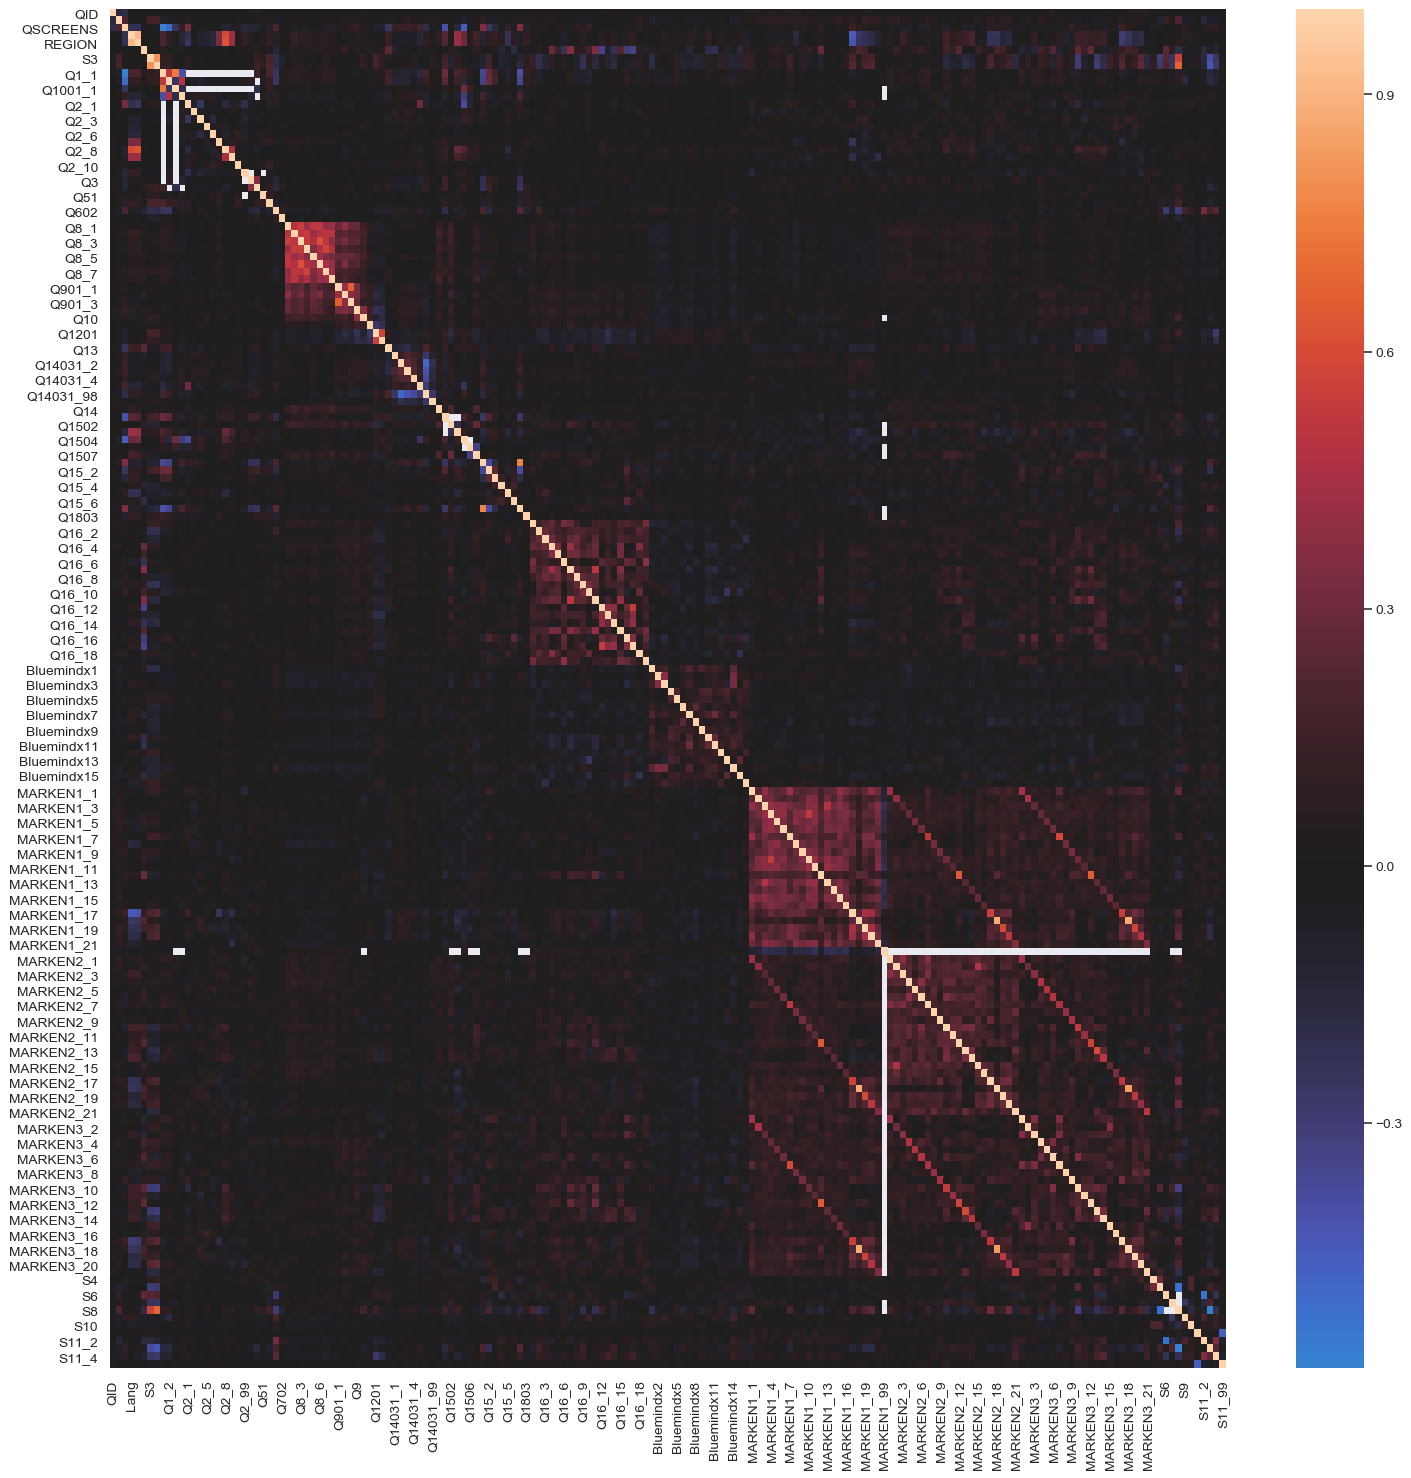

In [7]:
sns.heatmap(sbb_corr, center=0);